# Task 1 - Analyzing Italy's Performance in the Olympic Games

In [85]:
import hashlib as hl
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
athlete_events = pd.read_csv("./Data/athlete_events.csv")

First, we have to anonymize the name-column using SHA-256.

In [87]:
athlete_events["Name"] = athlete_events["Name"].apply(lambda name: hl.sha256(name.encode()).hexdigest())

In [88]:
athlete_events.sample(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
120116,60794,2b1dd63a55f16825e22c14b55e4d28b8f0bba99fb8c2a4...,M,24.0,184.0,81.0,Hungary,HUN,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN
175510,88215,265a7b5ae6365c720f1a490e9d29bff3ac691692733da7...,M,30.0,173.0,63.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's 400 metres Hurdles,NaN


Before analyzing any data, we have to find out if it is clean enough.

In [89]:
athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

So, the columns Age, Height, Weight and Medal have n/a data, which we will have to hold in mind during the analysis.

## The Sports Italy Has Won the Most Medals In

In [90]:
medals = athlete_events.query("Medal == 'Gold' or Medal == 'Silver' or Medal == 'Bronze'")
italy_medals = medals.query("Team == 'Italy'")

italy_medals.value_counts("Medal")

Medal
Gold      535
Silver    508
Bronze    484
Name: count, dtype: int64

In [91]:
italy_medals_count = italy_medals.value_counts("Sport")

In [92]:
px.bar(
    italy_medals_count,
    title="Italy medals",
    labels={"value": "Number of medals", 
            "variable": "Medals", 
            "count": "Number of medals"},
    template="simple_white"
    )

Italy has claimed the highest number of medals in Fencing (359 medals), Rowing (145 medals), Cycling (124 medals), and Water Polo (120 medals). In the next part of our project, we will demonstrate that Fencing is not just Italy's top sport in terms of winning medals, but Italy is, in fact, an Olympic fencing powerhouse, boasting the most fencing medals in the world.

## Number of medals per Olympic Game

In [93]:
medals_per_game = italy_medals.groupby("Year")[["Season"]].value_counts()
medals_per_game.sort_values(ascending=False)

Year  Season
2004  Summer    104
1960  Summer     85
1920  Summer     84
1932  Summer     77
1928  Summer     72
1996  Summer     71
1936  Summer     70
2016  Summer     70
2012  Summer     68
1948  Summer     67
2000  Summer     65
1984  Summer     63
1952  Summer     52
1924  Summer     51
1964  Summer     51
1956  Summer     45
1992  Summer     45
2008  Summer     42
1980  Summer     37
1968  Summer     33
1976  Summer     31
1988  Summer     29
1994  Winter     26
1972  Summer     25
1912  Summer     25
2006  Winter     21
2002  Winter     19
1992  Winter     19
1998  Winter     15
2014  Winter     14
1906  Summer      9
1908  Summer      8
1988  Winter      8
2010  Winter      5
1900  Summer      5
1976  Winter      4
1972  Winter      3
1952  Winter      2
1968  Winter      2
1984  Winter      2
1948  Winter      1
1980  Winter      1
1960  Winter      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Italy medals by year')

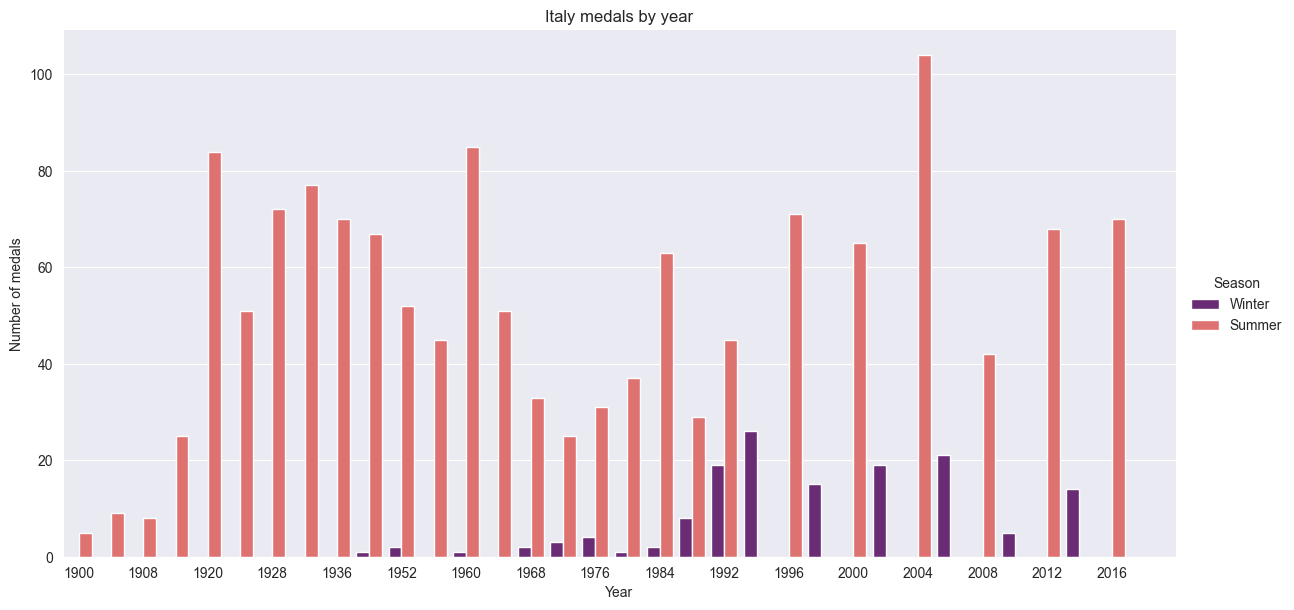

In [94]:
sns.set_style('darkgrid')
sns.catplot(x='Year', kind='count', hue='Season', data=italy_medals,
            aspect=2, hue_order=["Winter", "Summer"], palette='magma', height=6)
#plt.figure(figsize=(13, 9))
plt.xticks([i for i in range(0, 35, 2)])
plt.ylabel("Number of medals")
plt.title("Italy medals by year")

The most successful season for Italians was Summer 2004, where they won 104 medals.

## Medals per age groups

In [95]:
age_count = italy_medals["Age"].value_counts()
age_count

Age
25.0    126
23.0    126
21.0    116
26.0     98
24.0     96
22.0     96
29.0     96
27.0     87
28.0     82
20.0     79
31.0     75
30.0     64
33.0     63
32.0     47
34.0     44
19.0     32
35.0     28
37.0     27
36.0     25
38.0     18
18.0     17
39.0     11
17.0      9
43.0      8
40.0      7
16.0      6
14.0      6
46.0      5
41.0      5
42.0      5
15.0      3
45.0      3
44.0      2
49.0      2
12.0      2
47.0      1
11.0      1
59.0      1
57.0      1
13.0      1
Name: count, dtype: int64

In [96]:
italy_medals["Age"].isna().sum()

6

In [97]:
fig = px.histogram(
    age_count,
    x=age_count.index,
    y=age_count.values,
    nbins=len(age_count.index),
    labels={
        "Age": "Age Group", 
        "sum of y": "Number of Athletes"
    },
    title="Total number of medals awarded athletes per age group",
    template="simple_white",
)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(yaxis_title="Number of medals")

The age groups that win the most medals are 22-23 and 24-25, where both age groups won 222 medals.

## Total number of athletes per age group

In [98]:
italy_athletes = athlete_events.query("Team == 'Italy'")
italy_athletes.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
192960,96893,11ed3991a04a12f0921aafd8afbd6995600758b26e3cdd...,M,20.0,168.0,66.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
212066,106464,2372a0fefd2c5f623e0b04b17743ecc7fcad7ddb40919b...,F,17.0,NaN,NaN,Italy,ITA,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Team All-Around,NaN
69083,35224,ca40d2c0acf01df56de8c4d213592667b913e34861a287...,M,24.0,NaN,NaN,Italy,ITA,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Parallel Bars,NaN


In [99]:
italy_athletes.isna().sum()

ID           0
Name         0
Sex          0
Age        338
Height    2488
Weight    2798
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     8733
dtype: int64

In [100]:
all_italy_athletes = italy_athletes["Age"].value_counts()

In [101]:
fig = px.histogram(
    all_italy_athletes,
    x=all_italy_athletes.index,
    y=all_italy_athletes.values,
    nbins=len(all_italy_athletes.index),
    title="Total number of athletes per age group",
    template="simple_white"
)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(yaxis_title="Number of athletes")

fig.show()

While the most common age range for receiving medals in the Italian team is 22-23 and 23-24, the most frequent age of athletes competing from Italy is 22-23 years. Overall, this aligns with a global trend

## Further insights

In [102]:
italy_events = athlete_events.query("Team == 'Italy'")

In [103]:
italy_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,1c1026605c0607937a724d3d839d964064f6907b3b2e0e...,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,91,d5ce4ad5e9aa7549d6069b66cfefa8df14d801fd845cc7...,M,27.0,190.0,80.0,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,92,207f8f997895f35185acbd1e26fab5176d8b3dc6f3300f...,M,21.0,180.0,73.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
214,103,5a52f67df03607d3096242e2779913d915ccb30d26438f...,M,25.0,NaN,NaN,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,e54ebcdcbc9a487cea464c1def380df0dc1ea3d7f4ba83...,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


### Average athlete height per sport, ordered alphabetically by sports

In [104]:
sport_heights_mean = italy_events.groupby("Sport").agg({'Height': 'mean'})
sport_heights_mean = sport_heights_mean.dropna()

fig = px.bar(
    sport_heights_mean,
    x=sport_heights_mean.index,
    y="Height",
    title="Average athlete height per sport",
    template="simple_white",
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45       
    ),
    yaxis = dict(
        range = [150, 200]
    )
)

fig.show()

## Average athlete height per sport, ordered by height

In [105]:
sport_heights_mean.sort_values(by="Height", inplace=True)

fig = px.bar(
    sport_heights_mean,
    x=sport_heights_mean.index,
    y="Height",
    title="Average athlete height per sport",
    template="simple_white",
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45       
    ),
    yaxis = dict(
        range = [150, 193]
    )
)

fig.show()

In [106]:
athlete_events['Height'].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [107]:
italy_events['Height'].describe()

count    7772.000000
mean      175.220278
std        10.179340
min       141.000000
25%       168.000000
50%       175.000000
75%       182.000000
max       215.000000
Name: Height, dtype: float64

The mean height of all the dataset's population is approximately 175.34 cm, with a standard deviation of 10.52 cm. The heights range from a minimum of 127 cm to a maximum of 226 cm. The interquartile range (IQR), representing the middle 50% of the data, spans from the 25th percentile (168 cm) to the 75th percentile (183 cm). This summary indicates a moderate level of variability in the heights of athletes, with the majority falling within the range of 168 cm to 183 cm.

Comparing the height statistics between the entire dataset and Italian athletes specifically, we observe a slight difference. The mean heights are very close, with the Italian athletes having a slightly lower standard deviation (10.1 against 10.5). The minimum and maximum heights for Italian athletes also fall within the overall range. This suggests that Italian athletes generally follow the same height distribution as the sportsmen all over the world, but with a slightly narrower spread.

The highest sportsmen are of course in Basketball, while Gymnasts are generally the lowest.

### BMI index in by sport

In [108]:
# BMI = kg/((height/100)**2)
# Normal BMI: 18.5 to 24.9

italy_events["BMI"] = italy_events["Weight"] / ((italy_events["Height"]/100)**2)

fig = px.box(
    italy_events,
    x="Sport",
    y="BMI",
    color="Sex",
    title="BMI index in different sports"
)

# The lines show the range of a healthy BMI
fig.add_shape(
    type='line',
    x0="Rowing",
    x1="Rhythmic Gymnastics",
    y0=18.5,
    y1=18.5,
    line=dict(color='red', width=2, dash='dash'),
    name="Min range healthy BMI"
)

fig.add_shape(
    type='line',
    x0="Rowing",
    x1="Rhythmic Gymnastics",
    y0=24.9,
    y1=24.9,
    line=dict(color='red', width=2, dash='dash'),
    name="Max range healthy BMI"
)

fig.update_layout(
    xaxis = dict(
        tickangle=-45
    ),
    autosize = False,
    width = 1100,
    height = 900
)

fig.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_7588\1360348030.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## BMI index by age

In [109]:
fig = px.box(
    italy_events,
    x="Age",
    y="BMI",
    color="Sex",
    hover_data=["Sport", "Year"],
    title="BMI index by age"
)

# The lines show the range of a healthy BMI
fig.add_shape(
    type='line',
    x0=italy_events['Age'].min(),
    x1=italy_events['Age'].max(),
    y0=18.5,
    y1=18.5,
    line=dict(color='red', width=2, dash='dash'),
    name="Min range healthy BMI"
)

fig.add_shape(
    type='line',
    x0=italy_events['Age'].min(),
    x1=italy_events['Age'].max(),
    y0=24.9,
    y1=24.9,
    line=dict(color='red', width=2, dash='dash'),
    name="Max range healthy BMI"
)

fig.update_layout(
    autosize = False,
    width = 1200,
    height = 900
)

fig.show()

As can be seen from the graph, the majority of sportsmen have a healthy BMI. Example of sports with the unhealthiest BMI are:

Gymnastics and Athletics are most common sports between those having low BMI

Higher BMI is generally more average, than the lower one, with Judo, Weightlifting and Athletics again on the top.

Athletics is the only sport, where Italian sportsmen can vary from too-low to too-high BMI.